In [ ]:
import time
import os
import random
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# Загрузка картинок


## С диска 

In [ ]:
from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/My Drive/neural university/Проект/' # Указываем путь к обучающей выборке с оригинальными изображения
train_directory = directory +  'dataset/train/' # Название папки с файлами обучающей выборки
test_directory = directory + 'dataset/test/' # Название папки с файлами проверочной выборки

## Локально

In [ ]:
directory = 'F:/projectFroot/' # Указываем путь к обучающей выборке с оригинальными изображения
train_directory = directory +  'dataset/train/' # Название папки с файлами обучающей выборки
test_directory = directory + 'dataset/test/' # Название папки с файлами проверочной выборки

#Создание выборки

In [ ]:
img_width = 300 # Ширина уменьшенной картинки 
img_height = 300 # Высота уменьшенной картинки 
batch_size = 10

datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.2 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_directory, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    test_directory, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки.
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 8721 images belonging to 2 classes.
Found 538 images belonging to 2 classes.


#Сверточная нейронная сеть

In [ ]:
class Мodel:
  def __init__(self):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])
    self.model = model


In [ ]:
with tf.device('/gpu:0'):
  model = Мodel()
  history = model.model.fit(train_generator, 
                      batch_size=batch_size, 
                      epochs=20,
                      validation_data=validation_generator,
                      verbose=1)

Epoch 1/20
873/873 [==============================] - 224s 256ms/step - loss: 0.5276 - accuracy: 0.7161 - val_loss: 0.4046 - val_accuracy: 0.8271
Epoch 2/20
873/873 [==============================] - 200s 229ms/step - loss: 0.3235 - accuracy: 0.8666 - val_loss: 0.2378 - val_accuracy: 0.9052
Epoch 3/20
873/873 [==============================] - 199s 228ms/step - loss: 0.2647 - accuracy: 0.8953 - val_loss: 0.2436 - val_accuracy: 0.8959
Epoch 4/20
873/873 [==============================] - 191s 219ms/step - loss: 0.2384 - accuracy: 0.9026 - val_loss: 0.2067 - val_accuracy: 0.9164
Epoch 5/20
873/873 [==============================] - 188s 215ms/step - loss: 0.2308 - accuracy: 0.9108 - val_loss: 0.1967 - val_accuracy: 0.9126
Epoch 6/20
873/873 [==============================] - 182s 208ms/step - loss: 0.2095 - accuracy: 0.9186 - val_loss: 0.1808 - val_accuracy: 0.9368
Epoch 7/20
873/873 [==============================] - 184s 210ms/step - loss: 0.2024 - accuracy: 0.9197 - val_loss: 0.2377 -

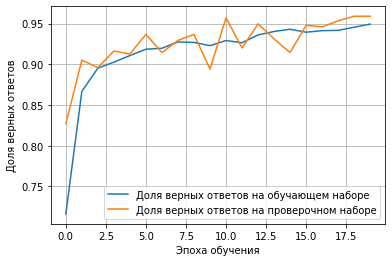

In [ ]:
plt.grid(True)
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# model.model.save(directory+"val_096.h5")